<a href="https://colab.research.google.com/github/sinaabbasi1/applied-data-science/blob/main/Assignments/Assignment%2006/ADS_Assignment_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#About Dataset

This dataset shows us insurance costs and some of parameters that possibly affect on that

##Columns

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

#Loading the Dataset

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import PercentFormatter
import os
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [ ]:
! kaggle datasets download -d mirichoi0218/insurance

  0% 0.00/16.0k [00:00<?, ?B/s]
100% 16.0k/16.0k [00:00<00:00, 10.6MB/s]


In [ ]:
!unzip \*.zip && rm *.zip

unzip:  cannot find or open *.zip, *.zip.zip or *.zip.ZIP.

No zipfiles found.


In [ ]:
df = pd.read_csv('insurance.csv')

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.shape

(1338, 7)

# EDA

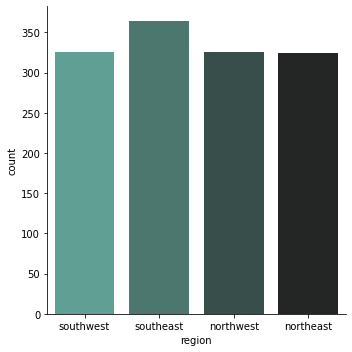

In [ ]:
sns.catplot(x='region', kind='count', palette="dark:#5A9_r", data=df)
plt.show()

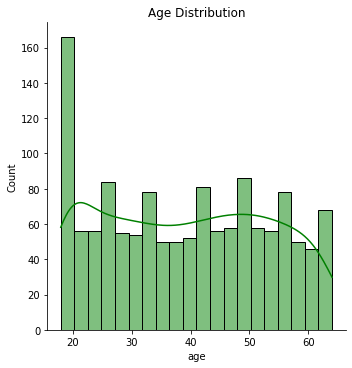

In [ ]:
sns.displot((df['age']), kde = True, bins=20, color='g')
plt.title('Age Distribution')
plt.show()

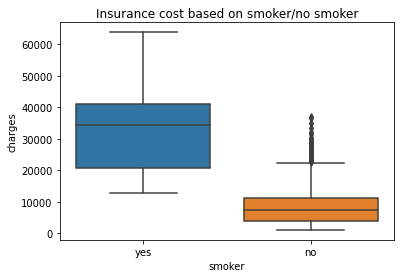

In [ ]:
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Insurance cost based on smoker/no smoker')
plt.show()

There is a non surprising result that shows us, there is major difference between smokers and non smokers in insurance cost

In [ ]:
df = pd.get_dummies(df)
df['overweight'] = (df.bmi >= 30).astype(int)
df['unhealthy'] = df.smoker_yes * df.overweight

In [ ]:
df

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,overweight,unhealthy
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1,0,0
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0,1,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0,1,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1,0,0


Here we consider people who have more than 30 bmi as an "Overweight" person

Plus we make another column that shows a person is kind of "Unhealthy" or not. If a person was smoker and his bmi was more than 30, we identify him as "Unhealthy"

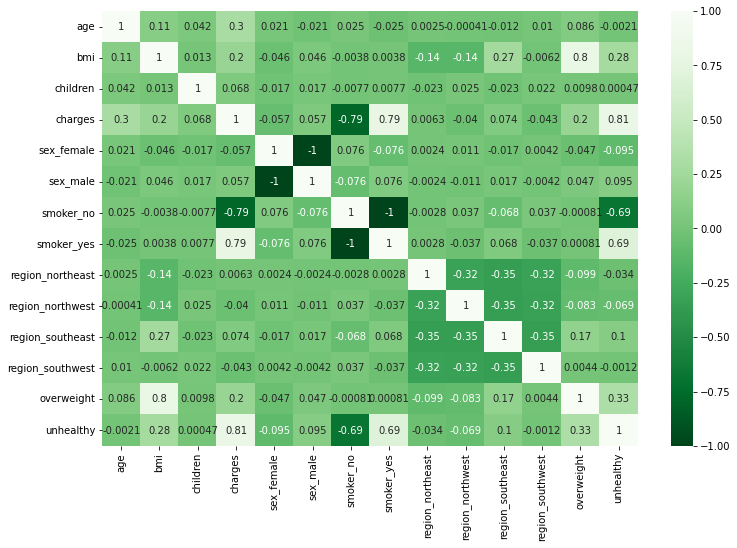

In [ ]:
plt.figure(figsize=(12, 8))

sns.heatmap(df.corr(), cmap='Greens_r', annot=True)
plt.show()

As it is clear, the column "Unhealthy" has the highest correlation with the a amount of insurance cost, followed by th column that shows whether a person is a smoker or not

**Split the target column :**

In [ ]:
target = df.pop('charges')

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression
feature_selector = SelectKBest(score_func=mutual_info_regression, k = 'all').fit(df, target)

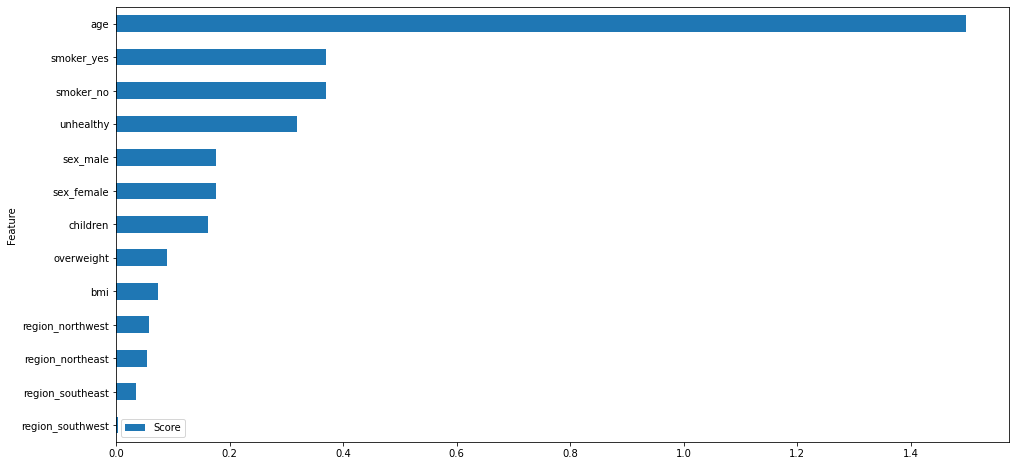

In [ ]:
feature_scores = pd.DataFrame({'Feature':df.columns,'Score':feature_selector.scores_})
feature_scores.sort_values(by=['Score'],inplace=True)

feature_scores[0:20].plot(x='Feature',y='Score',kind='barh',figsize=(16,8))
plt.show()

The "Age" parameter has the highest mutual infomation with insurance cost by a significant margin compaired to the other variables.

After that, there are "Smoker_yes"-"Smoker_no" and "Unhealthy" columns

In [ ]:
df.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,overweight,unhealthy
0,19,27.900,0,1,0,0,1,0,0,0,1,0,0
1,18,33.770,1,0,1,1,0,0,0,1,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0,0,0


Before doing anything, we have to normalize our column values in term of deleting the importance of the scale of columns

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
normalized_data = scaler.fit_transform(df)

**Split data into train and test set**

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(normalized_data, target, test_size=0.3, random_state=0)

#Linear Regression

Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.

In [ ]:
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
predicted_values = model.predict(x_test)

And finally, the $R^2$ score is:

In [ ]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

r2 = r2_score(y_test, predicted_values)
print('R2 Score for Linear Regression is : %.2f'%(r2))

R2 Score for Linear Regression is : 0.89


**Look at the coefficients :**

Once the regression is done, we can get the weights and get some insight from them. Most importantly, we can see what features has been identified as most important by the algorithm

In [ ]:
weights_linear = model.coef_

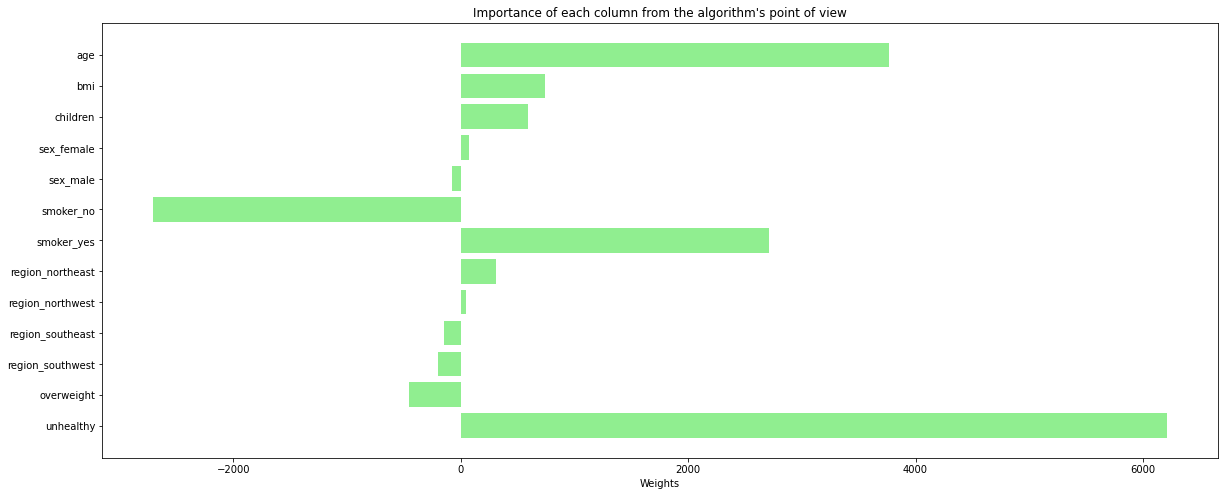

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
y_pos = np.arange(0,len(weights_linear),1)
labels = list(df.columns)

hbars = ax.barh(y_pos, weights_linear, align='center', color='lightgreen')
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Weights')
ax.set_title("Importance of each column from the algorithm's point of view")

plt.show()

#Lasso Regression

Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters). This particular type of regression is well-suited for models showing high levels of muticollinearity or when you want to automate certain parts of model selection, like variable selection/parameter elimination.

In [ ]:
model_lasso= linear_model.Lasso()
model_lasso.fit(x_train, y_train)
predicted_values = model_lasso.predict(x_test)

In [ ]:
R2_score = r2_score(y_test, predicted_values)
print('R2 Score for Lasso Regression is %.2f' %R2_score)

R2 Score for Lasso Regression is 0.89


**Lets take a look at how Lasso Regression removes the influence of some parameters :**

In [ ]:
weights_lasso = model_lasso.coef_

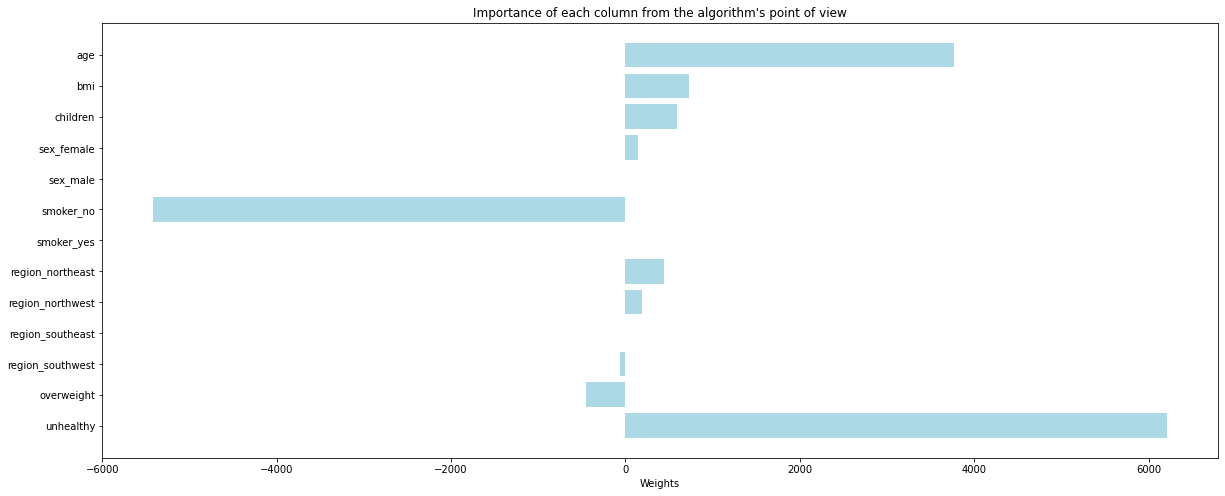

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
y_pos = np.arange(0,len(weights_linear),1)
labels = list(df.columns)

hbars = ax.barh(y_pos, weights_lasso, align='center', color='lightblue')
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Weights')
ax.set_title("Importance of each column from the algorithm's point of view")

plt.show()

#Ridge Regression

Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values being far away from the actual values

In [ ]:
model_ridge = linear_model.Ridge()
model_ridge.fit(x_train, y_train)
predicted_values = model_ridge.predict(x_test)

In [ ]:
R2_score = r2_score(y_test, predicted_values)
print('R2 Score for Ridge Regression is %.2f' %R2_score)

R2 Score for Ridge Regression is 0.89


#Kernel Regression

Polynomial regression is a special form of kernel-based regression. More generally, we can apply any nonlinear transformation suitable to our problem to transfer our data to a (usually) higher-dimensional space. Then, we can perform linear regression in this space.

##Polynomial Kernel

In [ ]:
from sklearn.kernel_ridge import KernelRidge
model = KernelRidge(kernel='polynomial')
model.fit(x_train, y_train)

In [ ]:
predicted = model.predict(x_test)

In [ ]:
R2_score_test = r2_score(y_test, predicted)
print('R2 Score is %.3f' %R2_score_test)

R2 Score is 0.880


## RBF Kernel

In [ ]:
from sklearn.kernel_ridge import KernelRidge
model = KernelRidge(kernel='rbf')
model.fit(x_train, y_train)

In [ ]:
predicted = model.predict(x_test)

In [ ]:
R2_score_test = r2_score(y_test, predicted)
print('R2 Score is %.3f' %R2_score_test)

R2 Score is 0.870


##Laplacian Kernel

In [ ]:
from sklearn.kernel_ridge import KernelRidge
model = KernelRidge(kernel='laplacian')
model.fit(x_train, y_train)

In [ ]:
predicted = model.predict(x_test)

In [ ]:
R2_score_test = r2_score(y_test, predicted)
print('R2 Score is %.3f' %R2_score_test)

R2 Score is 0.888


#Logistic Regression

## About the Dataset
The problem is to predict whether a cancer is benign or malignant using Breast Cancer Wisconsin dataset. Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.They describe characteristics of the cell nuclei present in the image.

### Feature Definition

1. ID number
2. Diagnosis (M = malignant, B = benign)
3. (3 - 32) :Ten real-valued features are computed for each cell nucleus:
<ol type="A">
  <li>radius (mean of distances from center to points on the perimeter)</li>
  <li>texture (standard deviation of gray-scale values)</li>
  <li>perimeter</li>
  <li>area</li>
  <li>smoothness (local variation in radius lengths)</li>
  <li>compactness (perimeter^2 / area - 1.0)</li>
  <li>concavity (severity of concave portions of the contour)</li>
  <li>concave points (number of concave portions of the contour)</li>
  <li>symmetry</li>
  <li>fractal dimension ("coastline approximation" - 1)</li>
</ol>





Import necessary libraries:


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import PercentFormatter
import os
import seaborn as sns

Reading the dataset:

In [ ]:
data = pd.read_csv('/content/data.csv', header = 0)

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


We don't have any null value except 'Unnamed: 32' column that we do not need it:

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Now, let's drop it alongside the 'id' column:

In [ ]:
data = data.drop(['id', 'Unnamed: 32'], axis=1)

In [ ]:
data = data.values # make data frame an ndarray which each row is a array contains 31 elements which represent each column

In [ ]:
data.shape

(569, 31)

Detach the target column:

In [ ]:
X = data[:,1:31].astype(float)
Y = data[:,0]

In [ ]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [ ]:
Y

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M

Using Standard Scaler to scale our data points:

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

std_scaler = StandardScaler()
# std_scaler = MinMaxScaler()

# df_scaled = std_scaler.fit_transform(data.to_numpy())
df_scaled = std_scaler.fit_transform(X)

# df_scaled = pd.DataFrame(df_scaled, columns=data_columns)
df_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

Distribution of each class:

In [ ]:
print('Class "Malignant" count: %d' %sum(Y=='M'))
print('Class "Benign" count: %d' %sum(Y=='B'))

Class "Malignant" count: 212
Class "Benign" count: 357


We need train and test data. So, we split our data into two parts:

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, Y, test_size=.3, random_state=7)

Using logistic regression to accomplish classification:

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='none', max_iter=120)
clf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(max_iter=120, penalty='none')

In [ ]:
predicted_target = clf.predict(X_test)

In [ ]:
X_test

array([[1.166e+01, 1.707e+01, 7.370e+01, ..., 4.262e-02, 2.731e-01,
        6.825e-02],
       [1.553e+01, 3.356e+01, 1.037e+02, ..., 2.014e-01, 3.512e-01,
        1.204e-01],
       [1.193e+01, 2.153e+01, 7.653e+01, ..., 7.247e-02, 2.438e-01,
        8.541e-02],
       ...,
       [1.065e+01, 2.522e+01, 6.801e+01, ..., 6.136e-02, 3.409e-01,
        8.147e-02],
       [1.989e+01, 2.026e+01, 1.305e+02, ..., 1.613e-01, 2.549e-01,
        9.136e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02]])

##$R^2$-Score

The metric we want to measure is $R^2$ score, defined as

$1 - \frac{\sum_{i=1}^{N} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{N} (y_i - \bar{y})^2}$

As before, $N$ is the total number of data points, $y_i$ are actual prices, $\hat{y}_i$ are our predictions and $\bar{y}$ is the average of all prices.

Basicially, $R^2$ score measure how much better we are perfroming compared to the simple "average predictor".





For calculating $R^2$ score first we need our predicted and true labels be numerical. So let's change our 'M' and 'B' labels to 0 and 1.

In [ ]:
y_test_numerical = np.array([0 if i == 'B' else 1 for i in y_test])

In [ ]:
predicted_target_numerical = np.array([0 if i == 'B' else 1 for i in predicted_target])

In [ ]:
from sklearn.metrics import r2_score
R2_score = r2_score(y_test_numerical, predicted_target_numerical)
print('R2 Score is %.4f' %R2_score)

R2 Score is 0.8124


Horaaaay, we reached our goal.